In [1]:
import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO

In [2]:
r = requests.get("https://www150.statcan.gc.ca/n1/en/tbl/csv/35100027-eng.zip?st=Ey1p_n6h")
files = ZipFile(BytesIO(r.content))
file = files.open(files.namelist()[0])
raw = pd.read_csv(file, encoding="utf-8")

C:\Users\dexmc\AppData\Local\Temp\ipykernel_24972\854458823.py:4: DtypeWarning: Columns (2,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(file, encoding="utf-8")


In [3]:
raw.head(5)

,REF_DATE,GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,Number,223,units,0,v55147158,2.1.1.1.1.1,9670.0,NaN,NaN,NaN,0
1,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,Number,223,units,0,v55147159,2.1.1.1.1.2,6805.0,NaN,NaN,NaN,0
2,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,Percentage,242,units,0,v55147160,2.1.1.1.1.3,70.0,NaN,NaN,NaN,0
3,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,Number,223,units,0,v55147161,2.1.1.1.1.4,0.0,NaN,NaN,NaN,0
4,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Stayed or withdrawn,Number,223,units,0,v55147162,2.1.1.1.1.5,2834.0,NaN,NaN,NaN,0


### Withdrawal rate for all offences

In [4]:
dfs = []

for offence in raw["Offences"].unique():
    data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == "Canada") & (raw['Offences'] == offence) & (raw["Charge and case"] == "Total charges")]
    pivot = data.pivot(columns="Type of decision", index='REF_DATE', values="VALUE")
    pivot["%_withdrawn"] = round(pivot["Stayed or withdrawn"] / pivot["Total decisions"] * 100, 2)
    pivot["offence"] = offence
    pivot["location"] = "Canada"

    df = pivot[["%_withdrawn", "offence"]]
    dfs.append(df)
    
all = pd.concat(dfs)

all

Type of decision,%_withdrawn,offence
REF_DATE,,
2005/2006,49.93,Total offences
2006/2007,50.44,Total offences
2007/2008,51.57,Total offences
2008/2009,51.39,Total offences
2009/2010,52.00,Total offences
...,...,...
2015/2016,23.31,Residual federal statutes
2016/2017,21.46,Residual federal statutes
2017/2018,23.79,Residual federal statutes


In [5]:
piv = all.pivot(columns="offence", values="%_withdrawn")

piv.to_clipboard()

In [6]:
dfs = []

for location in raw["GEO"].unique():
    for offence in raw["Offences"].unique():
        data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == location) & (raw['Offences'] == offence) & (raw["Charge and case"] == "Total charges")]
        pivot = data.pivot(columns="Type of decision", index='REF_DATE', values="VALUE")
        pivot["%_withdrawn"] = round(pivot["Stayed or withdrawn"] / pivot["Total decisions"] * 100, 2)
        pivot["offence"] = offence
        pivot["location"] = location

    df = pivot[["%_withdrawn", "offence"]]
    dfs.append(df)
    
all_locs = pd.concat(dfs)

all_locs

Type of decision,%_withdrawn,offence
REF_DATE,,
1994/1995,16.75,Residual federal statutes
1995/1996,26.18,Residual federal statutes
1996/1997,25.62,Residual federal statutes
1997/1998,25.24,Residual federal statutes
1998/1999,36.59,Residual federal statutes
...,...,...
2015/2016,53.66,Residual federal statutes
2016/2017,71.54,Residual federal statutes
2017/2018,63.64,Residual federal statutes


<AxesSubplot:xlabel='REF_DATE'>

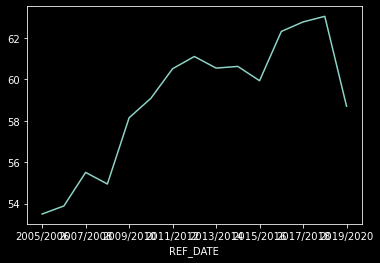

In [7]:
data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == "Canada") & (raw['Offences'] == "Drug possession") & (raw["Charge and case"] == "Total charges")]
pivot = data.pivot(columns="Type of decision", index='REF_DATE', values="VALUE")
pivot["%_withdrawn"] = round(pivot["Stayed or withdrawn"] / pivot["Total decisions"] * 100, 2)

pivot["%_withdrawn"].plot()

In [8]:
data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == "Canada") & (raw['Offences'] == "Total offences") & (raw["Charge and case"] == "Total charges")]
pivot = data.pivot(columns="Type of decision", index='REF_DATE', values="VALUE")

pivot

Type of decision,Acquitted,Guilty,Other decisions,Percentage guilty,Stayed or withdrawn,Total decisions
REF_DATE,,,,,,
2005/2006,37109.0,483248.0,27601.0,44.0,546473.0,1094431.0
2006/2007,36690.0,487424.0,25767.0,44.0,559706.0,1109587.0
2007/2008,33853.0,500729.0,23043.0,43.0,593884.0,1151509.0
2008/2009,34629.0,518610.0,23867.0,44.0,610218.0,1187324.0
2009/2010,37352.0,523602.0,26686.0,43.0,636551.0,1224191.0
2010/2011,35985.0,512358.0,27336.0,42.0,649108.0,1224787.0
2011/2012,40674.0,500845.0,22825.0,42.0,631825.0,1196169.0
2012/2013,40407.0,498325.0,20737.0,42.0,622876.0,1182345.0
2013/2014,37762.0,481542.0,25954.0,42.0,601942.0,1147200.0
